The following code is for image enhancement via image histogram equalization 

In [ ]:
pip install ipywidgets

OpenCV-pyhton package, Numpy and matplotlib to demonstrate the histogram equalization need to be imported 

In [ ]:
import numpy as np
import matplotlib
import cv2 as cv
from IPython.display import Image
from matplotlib import pyplot as plt

Using the file upload widget to select the image file 

In [ ]:
from ipywidgets import *
from IPython.display import clear_output, display
import ipywidgets as widgets
widgets.IntSlider()
from IPython.display import display
w = widgets.IntSlider()
uploader = widgets.FileUpload(
  #  accept='*.csv',  
    multiple=False  
)

display(uploader) 

FileUpload(value={}, description='Upload')

After selecting the file extract the file name and the content of it that is the image, load it to a new file and assign the path to the image. Then, display the histogram. The majority of pixels intensity ranges between 125 to 175. The far left and right do noy have any pixel intensity values. So, the image has poor contrast.

The Histogram Equalization improves the contrast of the image. I used OpenCV that has a function to do this, cv2.equalizeHist(). 

I choose a grayscale image and the output is the histogram equalized image. 
left is the original image; right is the result of histogram equalization
The right image looks clearer than the original image

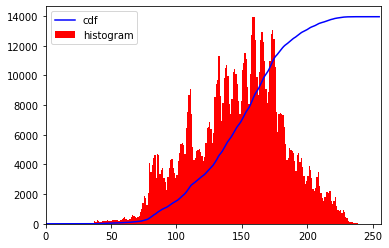

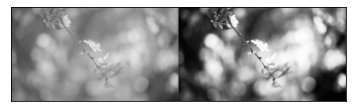

In [ ]:
import io
from PIL import Image

uploaded_filename = next(iter(uploader.value))
content = uploader.value[uploaded_filename]['content']
img_name=""

for name, file_info in uploader.value.items():
    img = Image.open(io.BytesIO(file_info['content']))
    img_name = name
    with open(name, 'wb') as fp:
        fp.write(file_info['content'])

choosen_img = './' + img_name


Image.open(choosen_img)

img = cv.imread(choosen_img,0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('enhancedImage.png',res)
img = cv.imread('/content/enhancedImage.png',0)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)
plt.show()


In [3]:
pip install watermark

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.0
    Uninstalling importlib-metadata-4.11.0:
      Successfully uninstalled importlib-metadata-4.11.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 2.1.3 which is incompatible.


In [4]:
%reload_ext watermark
%watermark -v -m -p numpy,watermark,cv2,PIL,ipywidgets,matplotlib
print(" ") 
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.12
IPython version      : 5.5.0

numpy     : 1.21.5
watermark : 2.3.0
cv2       : 4.1.2
PIL       : 7.1.2
ipywidgets: 7.6.5
matplotlib: 3.2.2

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.4.144+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit

 
Last updated: Tue Feb 15 2022 20:55:34UTC

